In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/home/aimsstudent31/Desktop/data/fraud.csv") 

In [ ]:
df=df.drop('Unnamed: 0', axis=1)

In [ ]:
df['index'] = df['index'].astype(object)
df['National Provider Identifier'] = df['National Provider Identifier'].astype(object)
df['Zip Code of the Provider'] = df['Zip Code of the Provider'].astype(object)

In [ ]:
cols=["Gender of the Provider","Entity Type of the Provider","Country Code of the Provider","State Code of the Provider","Place of Service","Medicare Participation Indicator","Place of Service","HCPCS Drug Indicator"]
for col in cols:
    df[col]=df[col].astype("category")

In [ ]:
df.info()

## Data Visualization


In [51]:
df["Provider Type"]= df["Provider Type"].astype("category")

In [68]:
data_crosstab = pd.crosstab(df['Provider Type'], 
                            df['Medicare Participation Indicator'],
                                margins = False)
print(data_crosstab)

Medicare Participation Indicator                  N      Y
Provider Type                                             
Addiction Medicine                                0      8
Advanced Heart Failure and Transplant Cardiology  0      1
All Other Suppliers                               0     31
Allergy/ Immunology                               0    308
Ambulance Service Provider                        0    327
Ambulatory Surgical Center                        0    512
Anesthesiology                                    0   2351
Anesthesiology Assistant                          0     52
Audiologist                                       0    198
Cardiac Surgery                                   0    143
Cardiology                                        1   4601
Centralized Flu                                   0    507
Certified Clinical Nurse Specialist               0     68
Certified Nurse Midwife                           0      7
Certified Registered Nurse Anesthetist (CRNA)     0   12

In [69]:
dd=df[df["Medicare Participation Indicator"]=="N"]
dd["Provider Type"].value_counts()

Chiropractic                                      7
Family Practice                                   5
Physical Therapist in Private Practice            5
Internal Medicine                                 4
Obstetrics & Gynecology                           2
Psychiatry                                        2
Dermatology                                       2
Interventional Radiology                          1
Plastic and Reconstructive Surgery                1
Cardiology                                        1
Geriatric Psychiatry                              1
Gastroenterology                                  0
General Practice                                  0
General Surgery                                   0
Geriatric Medicine                                0
Vascular Surgery                                  0
Emergency Medicine                                0
Gynecological Oncology                            0
Hand Surgery                                      0
Hematology  

## Plotting categorical variables

In [57]:
df['HCPCS Drug Indicator'].value_counts()

N    93802
Y     6198
Name: HCPCS Drug Indicator, dtype: int64

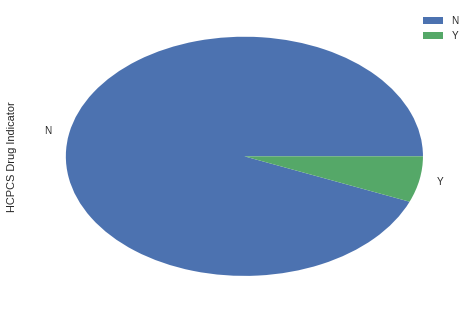

In [34]:
df['HCPCS Drug Indicator'].value_counts().plot.pie()

plt.legend()
plt.show()

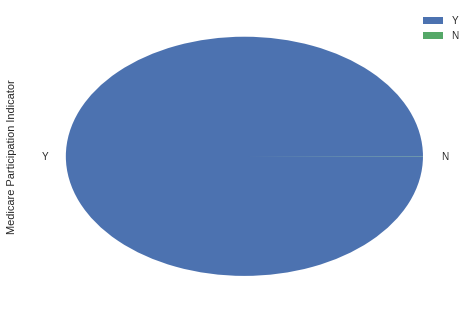

In [35]:
df['Medicare Participation Indicator'].value_counts().plot.pie()

plt.legend()
plt.show()

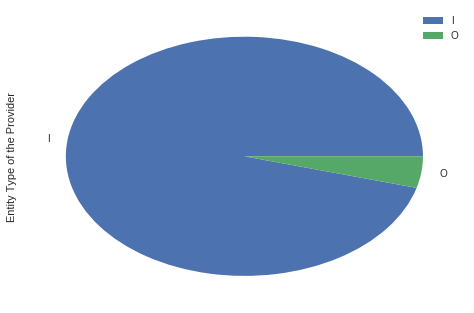

In [36]:
df['Entity Type of the Provider'].value_counts().plot.pie()

plt.legend()
plt.show()


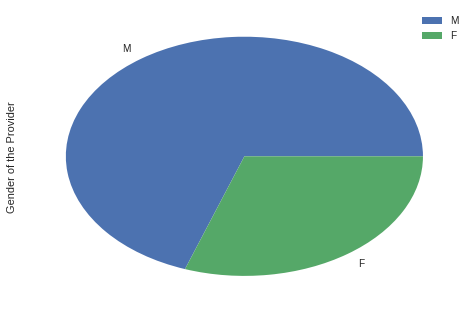

In [37]:
df['Gender of the Provider'].value_counts().plot.pie()

plt.legend()
plt.show() 

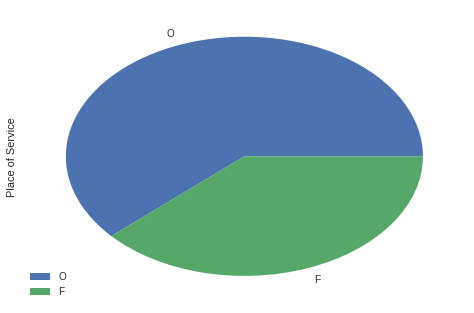

In [38]:
df['Place of Service'].value_counts().plot.pie()

plt.legend()
plt.show() 

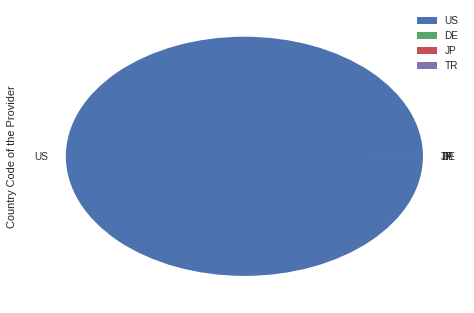

In [40]:
df['Country Code of the Provider'].value_counts().plot.pie()

plt.legend()
plt.show() 

In [ ]:
import numpy as np
cat_cols = ["Gender of the Provider","Entity Type of the Provider","Country Code of the Provider","State Code of the Provider","Place of Service","Medicare Participation Indicator","Place of Service","HCPCS Drug Indicator"]

#df['dummy'] = np.ones(shape = df.shape[0])
for col in cat_cols:
    print(col)
    counts = df[['index', col]].groupby(['index', col], as_index = False).count()
    #temp = counts[counts['index'] == 0][[col, 'dummy']]
    #temp = counts[counts['index'] == 1][[col, 'dummy']]
    plt.bar(col, counts)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Good credit')
    plt.ylabel('count')
    plt.show()

## DISTRIBUTION OF EACH VARIABLES

In [125]:
df.describe()


,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,239.671070,89.809310,142.115680,101.434155,354.550451,77.358795,78.030693
std,2493.185998,1109.616902,1640.227228,257.242779,1062.608271,199.718813,200.045458
min,11.000000,11.000000,11.000000,0.010000,0.010000,0.008679,0.008679
25%,21.000000,17.000000,20.000000,24.270000,57.647876,19.335228,20.121849
50%,43.000000,32.000000,40.000000,65.095000,146.000000,47.020176,47.841094
75%,118.000000,75.000000,106.000000,113.160000,298.932111,84.894452,84.879560
max,282739.000000,190306.000000,282737.000000,20494.000000,62694.000000,16067.300000,16957.148000


In [ ]:
def plot_box(credit, cols, col_x = 'index'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['Number of Services', 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', "Number of Distinct Medicare Beneficiary/Per Day Services"
            'Average Medicare Standardized Amount', 'Average Medicare Payment Amount', 'Number of Medicare Beneficiaries']
plot_box(df, num_cols)

In [ ]:
df.hist()

## COMPARING AMOUNTS PRESCRIBED

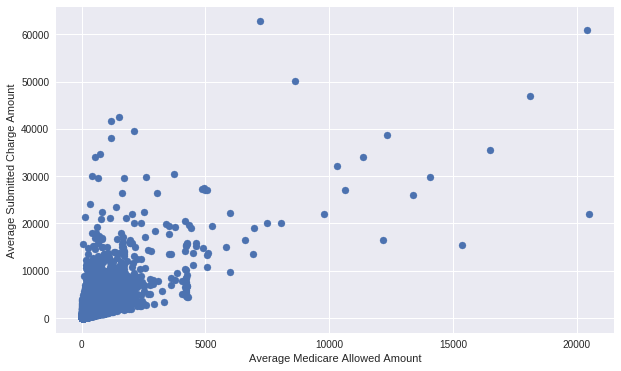

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['Average Medicare Allowed Amount'], y = df['Average Submitted Charge Amount'])
plt.xlabel("Average Medicare Allowed Amount")
plt.ylabel("Average Submitted Charge Amount")

plt.show()

In [77]:
df1=df[['index', 'Provider Type', 'HCPCS Code',"HCPCS Description"]]
df1

,index,Provider Type,HCPCS Code,HCPCS Description
0,8774979,Internal Medicine,99223,"Initial hospital inpatient care, typically 70 ..."
1,3354385,Obstetrics & Gynecology,G0202,"Screening mammography, bilateral (2-view study..."
2,3001884,Podiatry,99348,"Established patient home visit, typically 25 m..."
3,7594822,Internal Medicine,81002,"Urinalysis, manual test"
4,746159,Internal Medicine,96372,Injection beneath the skin or into muscle for ...
5,3443985,Physical Therapist in Private Practice,97016,Application of blood vessel compression or dec...
6,2137027,Diagnostic Radiology,20610,Aspiration and/or injection of large joint or ...
7,6169160,Family Practice,G0008,Administration of influenza virus vaccine
8,5086226,Family Practice,80061,"Blood test, lipids (cholesterol and triglyceri..."
9,3900718,Clinical Laboratory,84392,Urine sulfate (acid) level


In [92]:
d=df1[df1["Provider Type"]=="Internal Medicine"]
d["HCPCS Description"].nunique()

533

In [99]:
d2=df[["HCPCS Code", "Average Medicare Allowed Amount", "Average Submitted Charge Amount"]]
d2

,HCPCS Code,Average Medicare Allowed Amount,Average Submitted Charge Amount
0,99223,200.587778,305.211111
1,G0202,123.730000,548.800000
2,99348,90.650000,155.000000
3,81002,3.500000,5.000000
4,96372,26.520000,40.000000
5,97016,13.550990,63.112500
6,20610,45.971905,164.571429
7,G0008,29.330000,50.000000
8,80061,15.510411,76.000000
9,84392,6.510000,29.650000


In [94]:
df.groupby("HCPCS Code")["Average Medicare Allowed Amount"].unique()

HCPCS Code
00103    [85.752631579, 102.49682927, 190.09666667, 90....
00104    [60.777222222, 125.285, 51.809473684, 120.9424...
00140    [95.297857143, 130.918, 135.50352941, 130.4251...
00142    [132.872, 121.76663636, 85.986363636, 105.7779...
00144    [242.60058824, 189.96545455, 125.24142857, 111...
00145    [181.25642857, 188.95666667, 200.77489796, 139...
00160    [78.319375, 99.591818182, 94.921333333, 118.39...
00210    [649.68636364, 572.31263158, 423.24230769, 401...
00300    [140.66133333, 175.66426829, 102.58571429, 174...
00320    [259.8375, 156.66291667, 144.4975, 161.3253333...
00350    [238.01545455, 358.74742857, 313.33375, 214.57...
00400    [149.449, 74.332, 93.341, 86.584920635, 93.29,...
00402                         [463.44928571, 516.15909091]
00410    [49.313043478, 59.812666667, 52.6344, 58.16227...
00520    [113.7673913, 102.17636364, 136.60125, 112.266...
00530    [246.53357143, 109.30166667, 115.52333333, 145...
00532    [85.621538462, 155.4, 175.75818182, 

In [108]:
duplicat = d2.groupby([d2.duplicated(['HCPCS Code'])])['Average Medicare Allowed Amount'].unique()
duplicat

False    [200.58777778, 123.73, 90.65, 3.5, 26.52, 13.5...
True     [35.7, 3.5, 27.390625, 81.925862069, 69.467021...
Name: Average Medicare Allowed Amount, dtype: object